In [1]:
import warnings
warnings.filterwarnings("ignore")
import hdbscan

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}

from onc.onc import ONC

from pylab import rcParams

rcParams['figure.figsize'] = 14,6

%matplotlib inline

In [ ]:
X = df[['Conductivity (S/m)','Temperature (C)']].values

In [2]:
df = pd.read_csv('BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200305T000000Z_20200313T210509Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity',df.columns[15]: 'Temperature'},inplace=True)
X = df[['Conductivity','Temperature']].values

In [3]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15000, min_samples=20).fit(X)
#clusterer = hdbscan.HDBSCAN(metric='manhattan').fit(X)

In [4]:
labels = clusterer.labels_

In [5]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 2


In [6]:
# Separate outliers from clustered data
outliers_X = X[labels == -1]
clusters_X = X[labels != -1]

In [7]:
colors_clusters = labels[labels != -1]
colors_outliers = 'black'

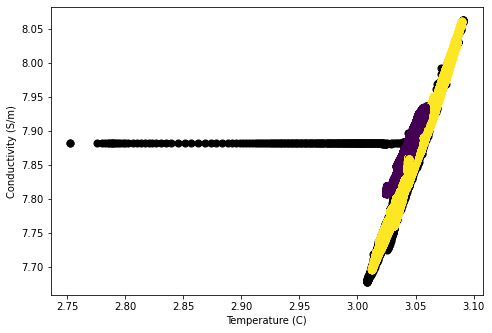

In [8]:
# plot clusters and outliers
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(outliers_X[:,0],outliers_X[:,1], c = colors_outliers,s =50)
ax.scatter(clusters_X[:,0],clusters_X[:,1], c = colors_clusters,s =50)
plt.ylabel("Conductivity (S/m)")
plt.xlabel("Temperature (C)")
plt.tight_layout()